# Heart Disease Prediction

In diesem Projekt wird eine Prognose von Herzkrankheiten mithilfe verschiedener Machine-Learning-Modelle durchgeführt. Zur Bewertung der Modellleistung werden die Metriken Accuracy, Precision und Recall verwendet.

- Accuracy misst den Anteil der korrekten Vorhersagen am gesamten Datensatz.
- Precision gibt an, wie genau das Modell bei der Vorhersage positiver Fälle (z.B. Herzkrankheit) ist, indem es das -Verhältnis der korrekt vorhergesagten positiven Fälle zu allen vorhergesagten positiven Fällen betrachtet.
- Recall (oder Sensitivität) zeigt, wie gut das Modell tatsächlich positive Fälle erkennt, indem es den Anteil der korrekt identifizierten positiven Fälle an allen tatsächlichen positiven Fällen angibt.
- ROC-AUC: Der AUC-Wert (Area Under the Curve) misst die Fähigkeit eines Modells, zwischen Klassen zu unterscheiden, wobei 1 eine perfekte Klassifizierung und 0,5 eine zufällige Klassifizierung bedeutet.
- Log Loss: Bewertet die Wahrscheinlichkeitsvorhersagen des Modells, wobei ein niedrigerer Wert auf bessere Vorhersagegenauigkeit hinweist, indem falsche Vorhersagen stärker bestraft werden.
- F1-Score: Ist das harmonische Mittel von Precision und Recall, das sowohl falsche Positive als auch falsche Negative berücksichtigt und bei unausgewogenen Datensätzen nützlich ist.

In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                          
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler                                
from sklearn.svm import SVC                                                    
from sklearn.preprocessing import Normalizer                                   
from sklearn.linear_model import LogisticRegression                             
from sklearn.naive_bayes import GaussianNB                                      
from sklearn.ensemble import RandomForestClassifier                            

### Einlesen der Daten

In [3]:
df = pd.read_csv('heart.csv')    

In [5]:
df.head()    

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Durch df.info() können wir sehen, dass der Datensatz komplett ist.

In [7]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Durch df.describe().T können wir sehen, eine transponierte Übersicht der wichtigsten statistischen Kennzahlen für die numerischen Spalten des DataFrames. Diese Übersicht enthält Informationen wie:

- count: Die Anzahl der nicht fehlenden Werte in jeder Spalte.
- mean: Der Durchschnittswert der jeweiligen Spalte.
- std: Die Standardabweichung, die die Streuung der Daten misst.
- min: Der kleinste Wert in der Spalte.
- 25%, 50% (Median), 75%: Die Perzentile, die angeben, wo 25%, 50% und 75% der Werte liegen.
- max: Der größte Wert in der Spalte.
Durch die Transponierung (T) werden die Spalten und Zeilen vertauscht, sodass die Variablen (Spalten) als Zeilen angezeigt werden. Dies erleichtert das Lesen, wenn der DataFrame viele Spalten enthält.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


### Countplot

<Axes: xlabel='sex', ylabel='count'>

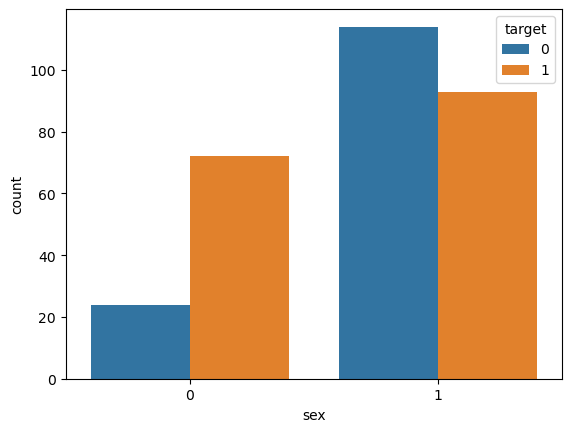

In [13]:
sns.countplot(data = df, x = 'sex', hue = 'target')

### Heatmap 

Das Heatmap-Diagramm zeigt die Korrelation zwischen verschiedenen Merkmalen eines Datensatzes. Auf den Achsen sind die Merkmale des Datensatzes abbgebildet. Die hellen Zellen zeigen eine starke Korrelation auf. Stark korrelierte Merkmale können oft redundant sein, während schwach korrelierte Merkmale möglicherweise wichtigere Informationen zur Vorhersage beitragen.

<Axes: >

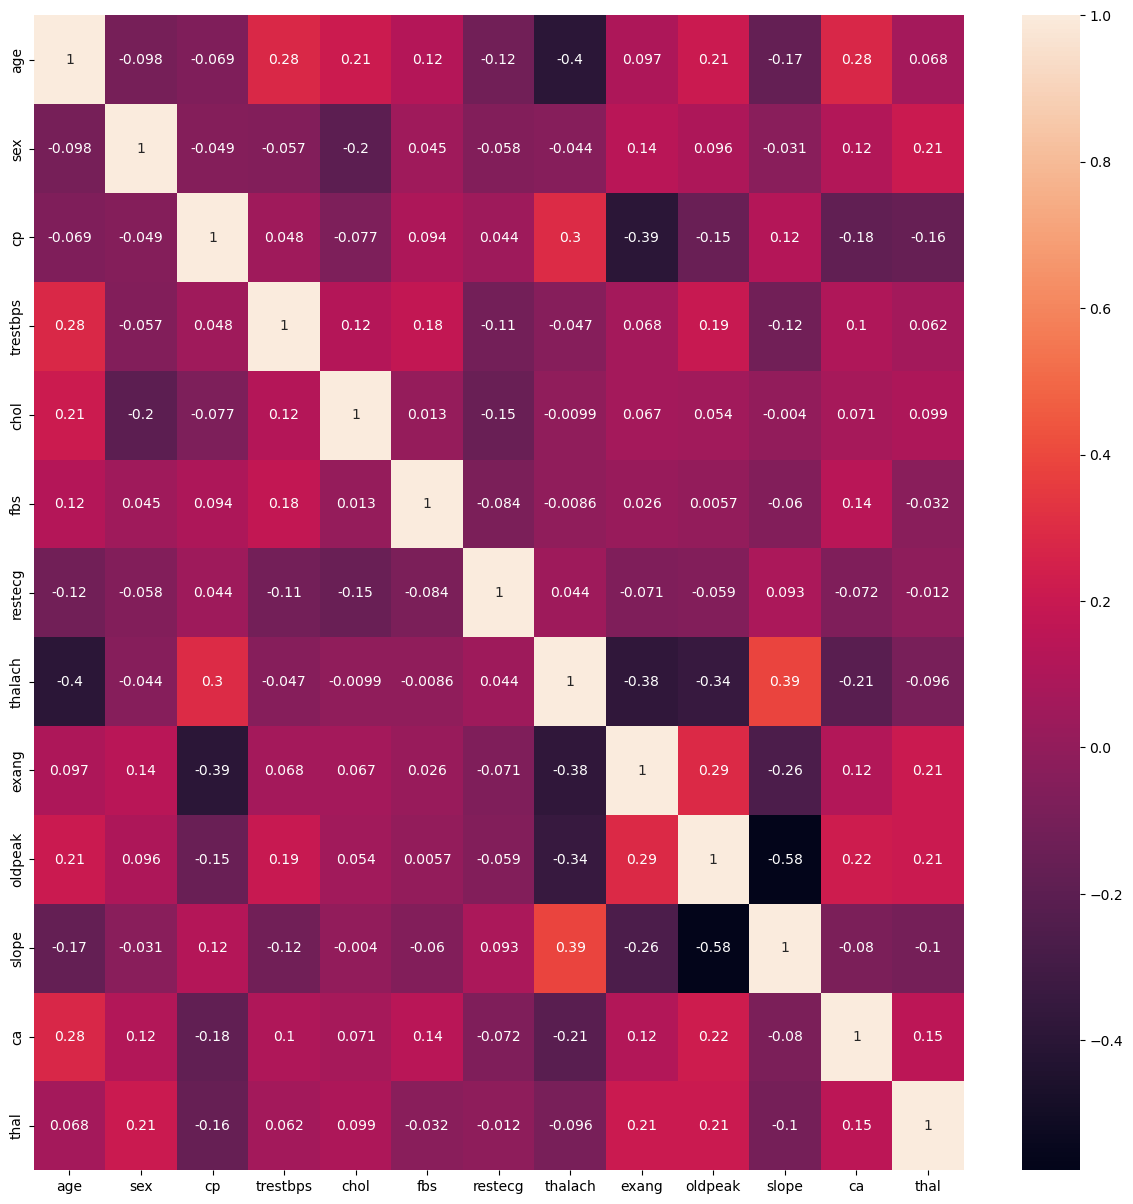

In [15]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.drop(['target'], axis = 1).corr(), annot = True)

### Regression Plot

Das Diagramm zeigt die Beziehung der Variablen age (Alter) und thalach (maximale Herzfrequenz). Mit steigendem Alter sinkt tendenziell die maximale Herzfrequenz.

<Axes: xlabel='age', ylabel='thalach'>

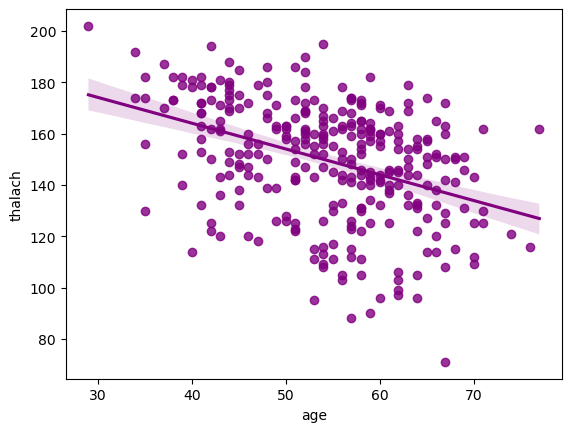

In [80]:
sns.regplot(x = 'age', y ='thalach', data = df, color = 'purple')

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Pairplot

Der Pairplot zeigt die Beziehungen zwischen den Merkmalen eines Datensatzes und der Zielvariable target auf. 
Auf der Diagonale befinden sich die Dichteplots und außerhalb die Streudiagramme. 

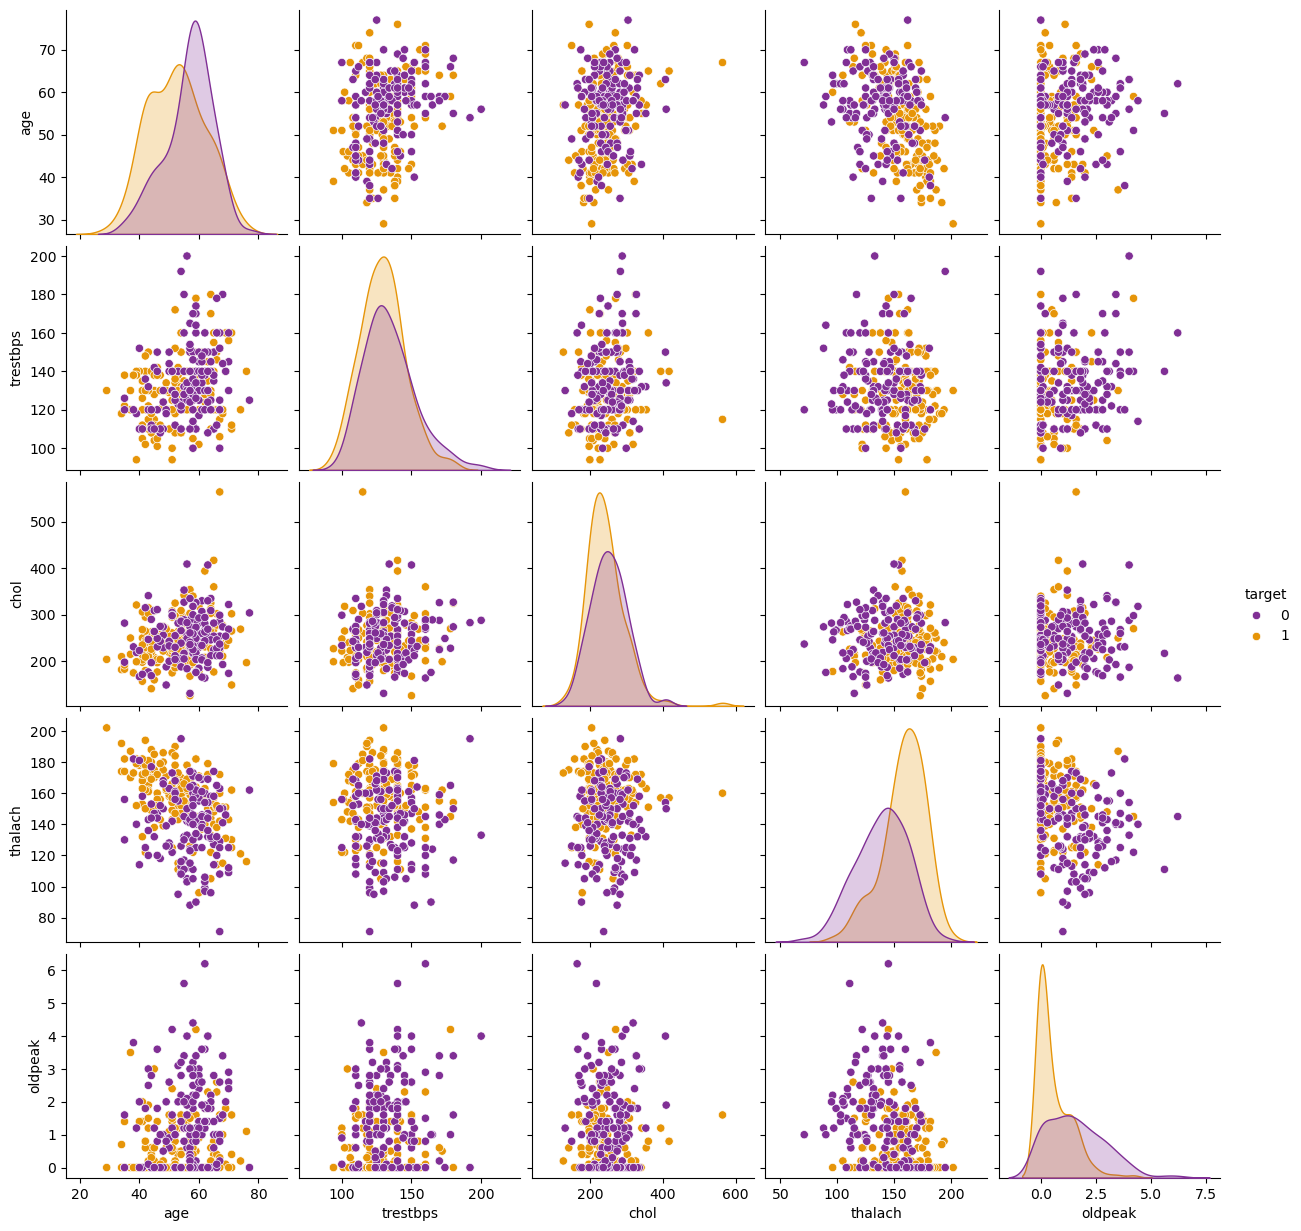

In [21]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue = 'target', palette = 'CMRmap')

### Regression Plot

Ebenfalls gab es wie in der Heatmap zu sehen war eine leicht positive Korrelation zwischen dem Alter (age) und dem Cholesterol (chol). Ältere Menschen neigen wie man dem Diagramm entnehmen kann zu einem höherem Cholesterinspiegel. Nur weil es eine Korrelation gibt heißt es jedoch nicht, dass ein erhöhtes Alter einen erhöhten Cholesterinspiegel verursacht.

<Axes: xlabel='age', ylabel='chol'>

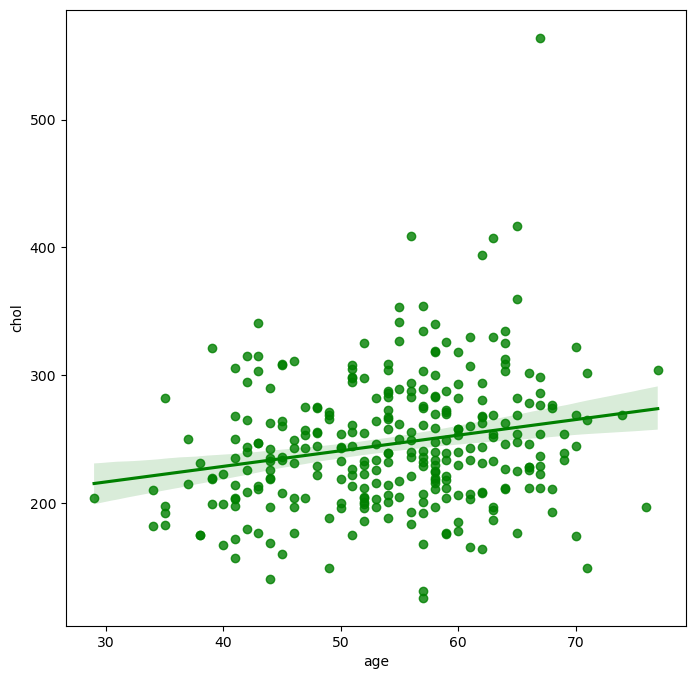

In [87]:
plt.figure(figsize = (8, 8))
sns.regplot(data = df, x = 'age', y = 'chol', color = 'green')

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Boxplot 'chol'


Der Boxplot zeigt, dass der Großteil der Cholesterinwerte (zwischen dem 1. und 3. Quartil) im Bereich von etwa 220 bis 280 liegt, mit einem Median von ca. 250. Es gibt jedoch einige Ausreißer mit deutlich höheren Cholesterinwerten über 400, die von den normalen Werten abweichen. Diese könnten möglicherweise auf besondere medizinische Zustände hinweisen.

<Axes: xlabel='chol'>

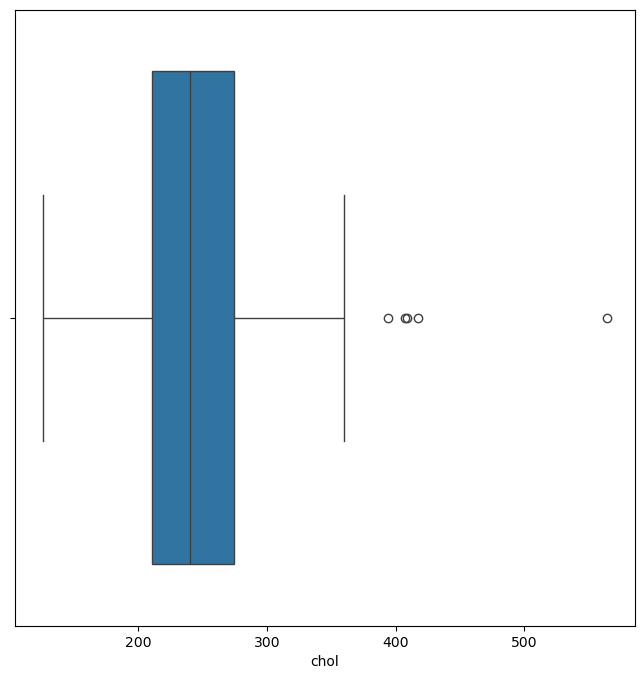

In [27]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'chol')

### Boxplot 'Thalach'

Der Boxplot zeigt die Verteilung der maximalen Herzfrequenz (thalach), wobei der Hauptteil der Werte zwischen etwa 140 und 160 liegt, mit einem Median von etwa 150. Es gibt einen Ausreißer unterhalb von 100, was auf eine ungewöhnlich niedrige maximale Herzfrequenz im Vergleich zum Rest der Daten hinweist.

<Axes: xlabel='thalach'>

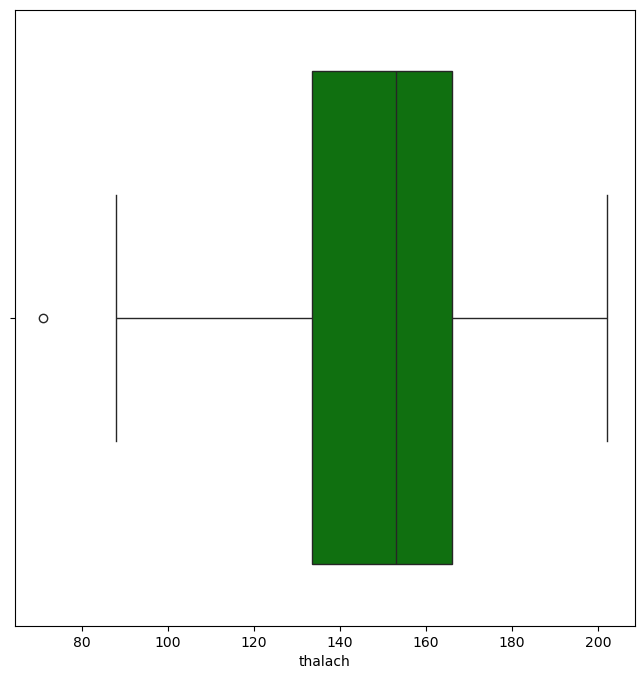

In [29]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'thalach', color = 'green')

### Boxplot 'age'

Der Boxplot zeigt die Verteilung des Alters (age), wobei der Hauptteil der Werte zwischen etwa 48 und 60 Jahren liegt, mit einem Median von etwa 55 Jahren. Es gibt keine Ausreißer, und die Alterswerte reichen von etwa 30 bis 75 Jahren.

<Axes: ylabel='age'>

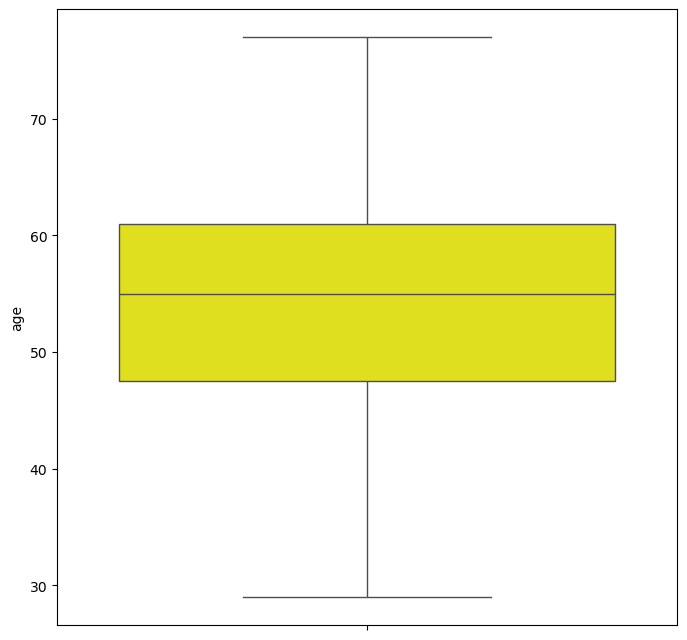

In [31]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, y = 'age', color = 'yellow')

In [33]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Train_Test_Split

In diesem Code teilen wir den Datensatz X (Features) und y (Zielvariable) in Trainings- und Testdaten auf. Dabei wird 30% des Datensatzes für das Testen verwendet (test_size = 0.3), und die zufällige Aufteilung wird durch den Parameter random_state = 100 reproduzierbar gemacht.

In [35]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [39]:
X_train.shape  

(212, 13)

In [41]:
X_test.shape 

(91, 13)

### Leere Listen

Wir erstellen eine leere Liste mit allen Werten, die für das Plotten der Balkendiagramme und den Vergleich der Ergebnisse benötigt werden. Für jeden Machine-Learning-Algorithmus speichern wir die Ausgabewerte in Listen, damit es später einfacher ist, verschiedene Plottoperationen durchzuführen.

In [149]:
accuracy_scaled = []             
f1_score_scaled = []
precision_score_scaled = []
recall_score_scaled = []
roc_auc_score_scaled = []
log_loss_scaled = []

accuracy_normalized = []
f1_score_normalized = []
precision_score_normalized = []
recall_score_normalized = []
roc_auc_score_normalized = []
log_loss_normalized = []

### Standardisieren und Normalisieren

Wir verwenden sowohl den StandardScaler als auch den Normalizer, um die Daten auf unterschiedliche Weise zu skalieren und zu normalisieren, was je nach Machine-Learning-Modell und Datensatz hilfreich sein kann. Wir führen beide Skalierungen durch, um verschiedene Ansätze auszuprobieren und die Modelle auf unterschiedliche Weise zu optimieren.
- Logistic Regression: Funktioniert am besten mit Standardisierung, um sicherzustellen, dass alle Merkmale gleich gewichtet sind.
- Naive Bayes: Benötigt weder Standardisierung noch Normalisierung, kann aber von der Standardisierung bei verzerrten Daten profitieren.
- Random Forest: Benötigt weder Standardisierung noch Normalisierung, da Entscheidungsbäume nicht skalenempfindlich sind.
- KNN: Funktioniert am besten mit Normalisierung, da es abstandsbasiert ist.

In [145]:
scaler = StandardScaler()                                                
scaler.fit(X_train)                                    
X_train_scaled = scaler.transform(X_train)             
X_test_scaled = scaler.transform(X_test)              

In [147]:
normalizer = Normalizer()                              
normalizer.fit(X_train)                                
X_train_normalized = normalizer.transform(X_train)     
X_test_normalized = normalizer.transform(X_test)       

### K-Nearest Neighbors (KNN)

Nun wenden wir verschiedene Machine Learning Algorithmen an. Im ersten Schritt wenden wir den KNN - Algorithmus an. Wir haben den Hyperparameter k 3 gewählt da es dem Modell ermöglicht, lokale Muster in den Daten besser zu erfassen.

Wir haben den KNN einmal auf unsere skalierten und einmal auf unsere normalisierten Daten angewendet. 

In [138]:
neigh1 = KNeighborsClassifier(n_neighbors = 3)          
neigh1.fit(X_train_scaled, y_train)                     
neigh2 = KNeighborsClassifier(n_neighbors = 3)          
neigh2.fit(X_train_normalized, y_train)                 

KNeighborsClassifier(n_neighbors=3)

Nun speichern wir die Vorhersagen in Variablen, die wir später in unseren Vergleich verwenden werden. 

In [141]:
y_test_predict_scaled = neigh1.predict(X_test_scaled)                   
y_test_predict_normalized = neigh2.predict(X_test_normalized)

Nun werden die Bewertungsmetriken Accuracy, F1-Score, Precision, Recall, ROC-AUC und Log Loss für die Vorhersagen sowohl der skalierten als auch der normalisierten Testdaten berechnet und in entsprechenden Listen gespeichert. Dies ermöglicht später den Vergleich der Modellleistung zwischen den skalierten und normalisierten Versionen.

In [143]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))             
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

### Logistic Regression

Die Logistische Regression ist ein Machine-Learning-Algorithmus, der für binäre Klassifikationsprobleme verwendet wird. Sie berechnet die Wahrscheinlichkeit, dass ein Datenpunkt zu einer bestimmten Klasse gehört, und trifft Entscheidungen, indem sie einen Schwellenwert (normalerweise 0,5) anwendet, um Vorhersagen in zwei Klassen zu unterteilen. Sie ist besonders nützlich, wenn die Beziehung zwischen den Features und der Zielvariable linear ist.

In [55]:
clf1 = LogisticRegression(random_state = 100)
clf2 = LogisticRegression(random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [57]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

### Naive Bayes Model

Das Naive Bayes-Modell ist ein Klassifikationsalgorithmus, der auf dem Bayes-Theorem basiert und dabei annimmt, dass alle Merkmale untereinander unabhängig sind. Es berechnet die Wahrscheinlichkeit, dass ein Datenpunkt zu einer bestimmten Klasse gehört, basierend auf den individuellen Wahrscheinlichkeiten der Merkmale. Naive Bayes ist besonders effizient bei großen Datensätzen und wird häufig bei Textklassifikationen wie Spam-Erkennung verwendet.

In [59]:
clf1 = GaussianNB()
clf2 = GaussianNB()
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [61]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

### Random Forest Classifier

Der Random Forest Classifier ist ein Ensemble-Lernalgorithmus, der mehrere Entscheidungsbäume trainiert und deren Ergebnisse kombiniert, um eine robustere Vorhersage zu treffen. Jeder Baum wird auf einer zufälligen Teilmenge der Daten trainiert, und das finale Ergebnis basiert auf der Mehrheitsabstimmung der Bäume. Random Forest ist bekannt für seine hohe Genauigkeit, Widerstandsfähigkeit gegenüber Overfitting, und seine Fähigkeit, sowohl mit kategorialen als auch numerischen Daten gut zu arbeiten.

In [63]:
clf1 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf2 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

In [65]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

### Barplot Metriken mit standardisierten Merkmalen

Das Balkendiagramm zeigt die Leistung verschiedener Machine-Learning-Modelle (KNN, Logistic Regression, Naive Bayes, Random Forest) anhand mehrerer Metriken, darunter Accuracy, F1-Score, Precision, Recall und ROC AUC, nachdem die Daten skaliert wurden.

Text(0.5, 1.0, 'Final scaled output results for machine learning models')

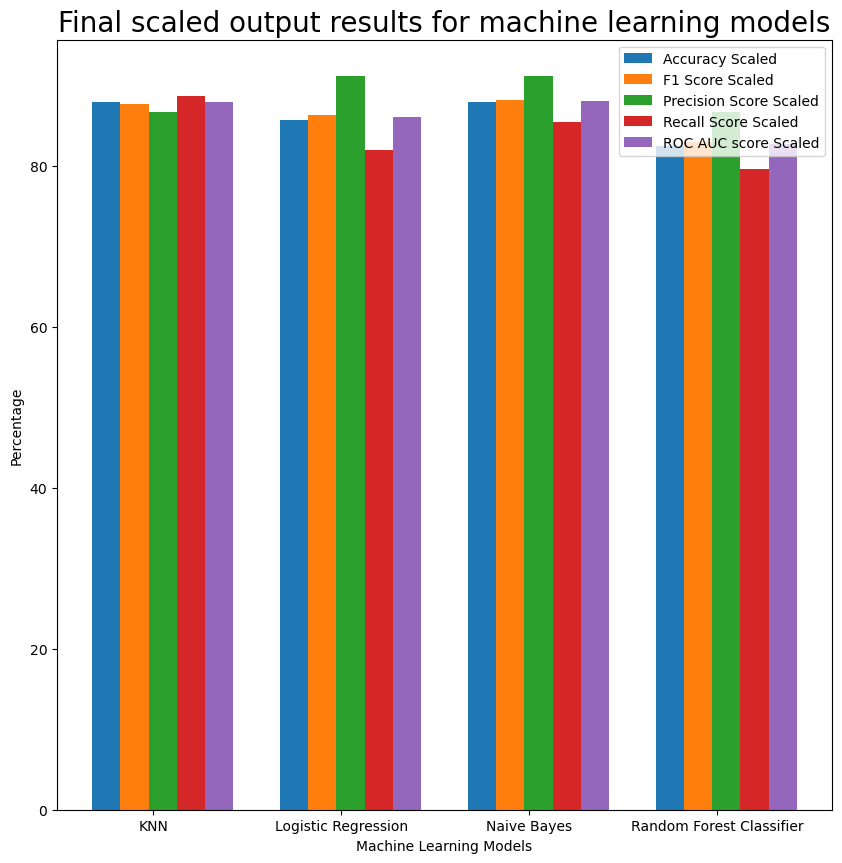

In [131]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (10, 10))           #Increasing the size of the figure so that it is clear 
plt.yticks(fontsize = 10)                #Increasing the fontsize of the y axis just to make it clear
#getting a barplot between models and accurcy_scaled list and multiplying those with 100 to make it clear in graph
plt.bar(models, [i * 100 for i in accuracy_scaled], width = 0.15) 
#Performing the same operations for other lists so that we would draw them later 
plt.bar(models + 0.15, [i * 100 for i in f1_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_scaled], width = 0.15)
plt.legend(['Accuracy Scaled', 'F1 Score Scaled', 'Precision Score Scaled', 'Recall Score Scaled', 'ROC AUC score Scaled'], fontsize = 10)
plt.xticks([i + 0.25 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 10)
plt.xlabel('Machine Learning Models', fontsize = 10) #Creating a label for the x-axis 
plt.ylabel('Percentage', fontsize = 10)  #Creating a label for the y-axis 
plt.title('Final scaled output results for machine learning models', fontsize = 20) #Adding a title with modified font size 

#### Interpretation
Der Random Forest Classifier zeigt die insgesamt beste Leistung, während Logistic Regression und Naive Bayes ebenfalls gute Ergebnisse liefern, aber in bestimmten Metriken (wie Precision oder Recall) etwas schwächer sind. KNN hat ebenfalls eine solide Leistung, ist jedoch leicht unterlegen im Vergleich zu den anderen Modellen.

### Barplot Metriken mit normalisierten Merkmalen

Das Balkendiagramm zeigt die normalisierten Ergebnisse für verschiedene Machine-Learning-Modelle (KNN, Logistic Regression, Naive Bayes und Random Forest), bewertet anhand der Metriken Accuracy, F1-Score, Precision, Recall und ROC AUC.

Text(0.5, 1.0, 'Final normalized results for machine learning models')

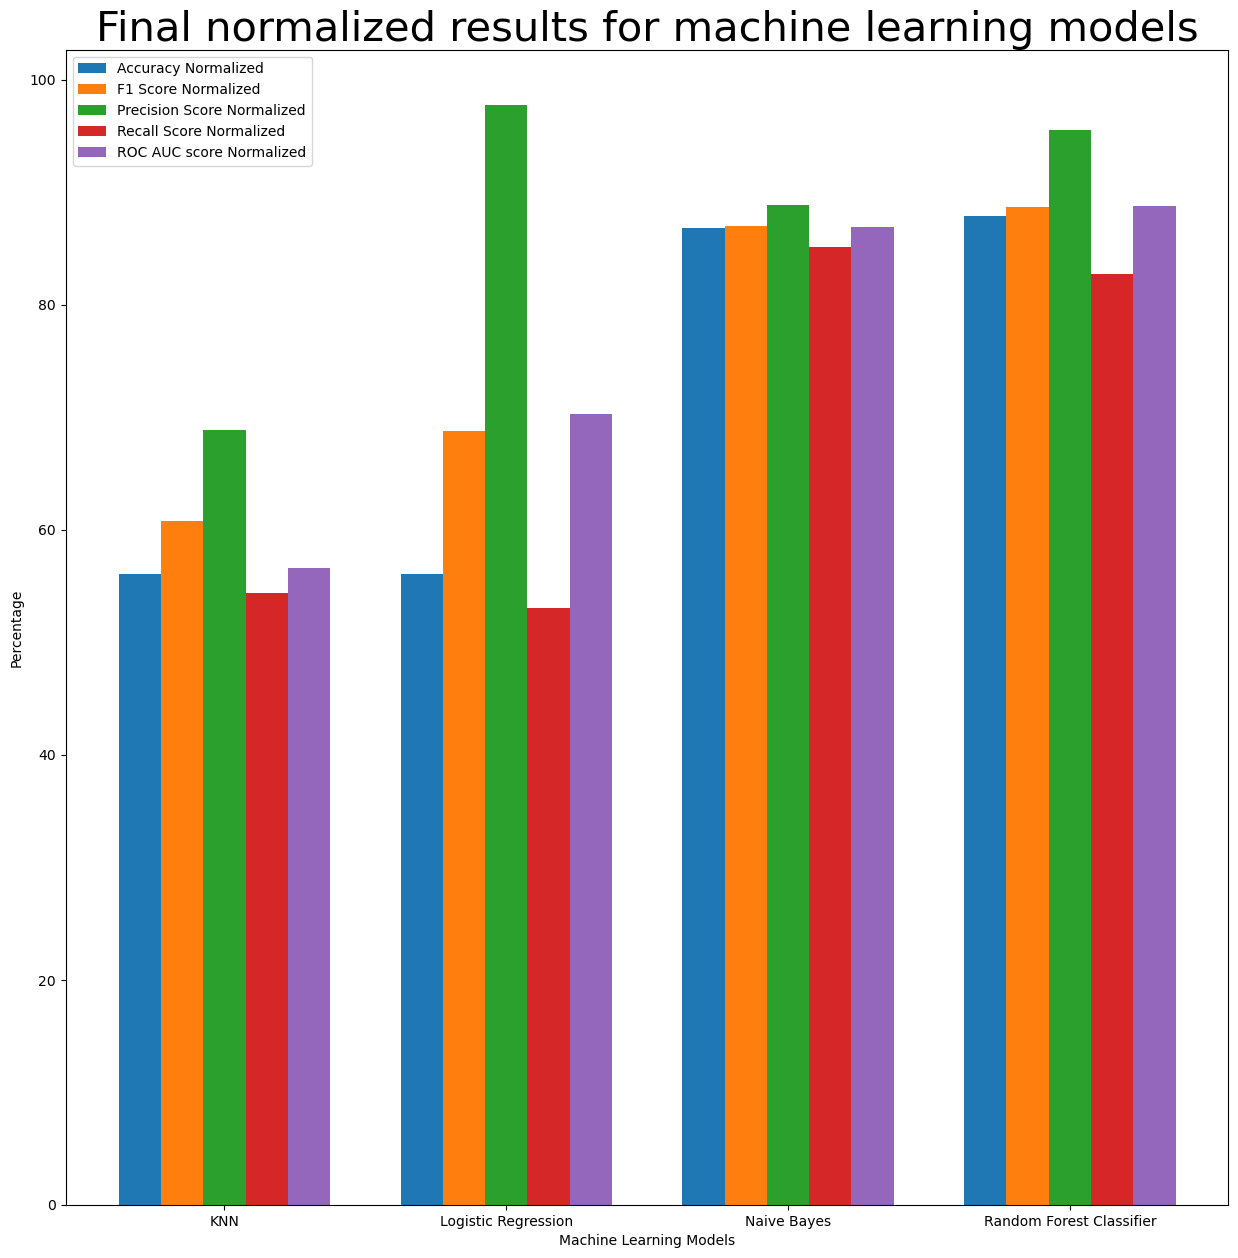

In [133]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted 
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (15, 15))
plt.yticks(fontsize = 10)
plt.bar(models, [i * 100 for i in accuracy_normalized], width = 0.15)
plt.bar(models + 0.15, [i * 100 for i in f1_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_normalized], width = 0.15)
plt.legend(['Accuracy Normalized', 'F1 Score Normalized', 'Precision Score Normalized', 'Recall Score Normalized', 'ROC AUC score Normalized'], fontsize = 10)
plt.xticks([i + 0.3 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 10)
plt.xlabel('Machine Learning Models', fontsize = 10)
plt.ylabel('Percentage', fontsize = 10)
plt.title("Final normalized results for machine learning models", fontsize = 30)

#### Interpretation
Im Vergleich der Modelle zeigt der Random Forest Classifier die beste Gesamtleistung. Er erzielt in allen Metriken, insbesondere bei Recall und ROC AUC, konsistent hohe Werte. Dies deutet darauf hin, dass er nicht nur eine hohe Trennschärfe zwischen den Klassen besitzt, sondern auch viele positive Fälle korrekt identifizieren kann, was ihn zur besten Wahl für dieses Problem macht.

## Fazit

Zusammenfassend lässt sich sagen, dass der Random Forest Classifier in beiden Fällen als das beste Modell hervortritt, während Logistic Regression eine zuverlässige Alternative bietet. KNN und Naive Bayes können je nach den spezifischen Anforderungen, insbesondere bei hoher Präzision, ebenfalls berücksichtigt werden.